# Book Recommendations

André Filipe Silva - 26005<br>
Nuno Pereira - 25809<br>
Sara Albuquerque - 31965<br>
Tobias Tesing - 41683

## **Business Problem: How to predict book ratings?**
Relevance: In a world in constant change and rapid growth, books have been losing its value. Therefore, it is important to apply strategies to increase their attractiveness (or, in a financial view, increase sales), namely, a machine learning algorithm that predicts books you would actually might want to read.

### Q&A from Midterm Project Submission

### **Question:** Is it a classification problem or a regression problem? 

**Answer:** We are solving a recommendations type of problem. We are using recommender systems to let our users know what could be the most interesting books for them, based on ratings generated for books that they have not read yet.

### **Question:** Is the goal to build a model that generates a ranked list, or is it to detect anomalies as new data come in? 

**Answer:** The goal in this study is to build a ranked list of book ratings - this was done through multiple models.

### **Question:** Are you doing clustering to find hidden patterns?

**Answer:** No, we are not applying clustering. We try to cluster book titles later on, but find that it does not make sense.

### __Question:__ If applicable, what is your target?

__Answer:__ Our targets are the unknown ratings, as we will essencially be generating book recommendations, which will boil down to generating ratings for books that the user has not read yet.

# Explorative Data Analysis

In [123]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from sklearn.cluster import KMeans
import random
random.seed(2949)

path = "C:/Users/tobia/OneDrive/Dokumente/Vwl/Master/4. Semester/Machine Learning/Project/Altered Data"

os.chdir(path)

# We had to edit line 6452 on the BX-Books.csv just to be able to run the read_csv. 
# Otherwise, we would always get this error: `ParserError: Error tokenizing data. C error: Expected 8 fields in line 6452, saw 9`
# We have sent in attachment the altered data files.

df_users = pd.read_csv("BX-Users.csv", delimiter = ";", encoding="ISO-8859-1")
df_books = pd.read_csv("BX-Books.csv", delimiter = ";", encoding="ISO-8859-1")
df_ratings = pd.read_csv("BX-Book-Ratings.csv", delimiter = ";", encoding="ISO-8859-1")

C:\Users\tobia\Anaconda3\envs\mlcourse1\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (3,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [125]:
df_users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [126]:
df_users['User-ID'].nunique()
df_users.shape                   # 278,858 users

278858

(278858, 3)

In [127]:
df_books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN


In [128]:
df_books.shape           # 271,379 books

(271379, 11)

In [129]:
df_ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [130]:
df_ratings.shape        # 1,149,780 ratings

(1149780, 3)

In [131]:
df = pd.merge(df_ratings, df_users, how = "inner", on="User-ID")

df = pd.merge(df, df_books, how= "inner", on= "ISBN")

df.rename(columns={"Book-Rating": "Rating", "Book-Title":"Title","Book-Author": "Author","Year-Of-Publication":"Year"}, inplace = True)

In [132]:
df.shape           # 196,842 obs left

(196842, 15)

In [133]:
df.head(5)

,User-ID,ISBN,Rating,Location,Age,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN,NaN,NaN
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN,NaN,NaN
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN,NaN,NaN
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN,NaN,NaN
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN,NaN,NaN


In [134]:
df.dtypes

User-ID          int64
ISBN            object
Rating           int64
Location        object
Age            float64
Title           object
Author          object
Year            object
Publisher       object
Image-URL-S     object
Image-URL-M     object
Image-URL-L     object
Unnamed: 8      object
Unnamed: 9      object
Unnamed: 10     object
dtype: object

We can see above that most features are objects. (Note: In fact, all of the features should appear as strings, except for `Age`, `Rating`, and `Year`, which are numerical.)
<br>
Our transformation of `Year` to numeric type was essencial as it pointed out mixes in columns, and led to proper data cleaning to ensure all the proper data was in its proper column (i.e. author in Author, year in Year, etc)

In [135]:
for i in range(len(df)):
    if df["Year"][i] == "Stan Berenstain":
        df.at[i, "Title"] = 'C is for Clown: A Circus of Words, (Bright and Early books for beginning beginners)'
        df.at[i, "Author"] = "Stan Berenstain"
        df.at[i, "Year"] = 1972
        df.at[i, "Publisher"] = "Random House Children's Books"
        df.at[i, "Image-URL-S"] = np.nan

In [136]:
for i in range(len(df)):
    if df["Year"][i]== "Gallimard" and df["Author"][i] == "2003":
        df.at[i, "Title"] = 'Peuple du ciel, suivi de Les Bergers'
        df.at[i, "Author"] = "Jean-Marie Gustave"
        df.at[i, "Year"] = 2003
        df.at[i, "Publisher"] = "Gallimard"

In [137]:
for i in range(len(df)):
    if df["Author"][i] == "2000" and df["Year"][i] == "DK Publishing Inc":
        df.at[i, "Title"] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
        df.at[i, "Author"] = "Michael Teitelbaum"
        df.at[i, "Year"] = 2000
        df.at[i, "Publisher"] = "DK Publishing Inc"   

In [138]:
for i in range(len(df)):
    if df["Year"][i] == "Luella Hill" and df["Publisher"][i] == "1998":
        df.at[i, "Title"] = "Solid as a rock I stand: Inspirational poetry and short stories"
        df.at[i, "Author"] = "Luella Hill"
        df.at[i, "Year"] = 1998
        df.at[i, "Publisher"] = "Straight from the Heart Associates"

In [139]:
for i in range(len(df)):
    if df["Year"][i] == "Salvador de Madariaga" and df["Publisher"][i] == "1976":
        df.at[i, "Title"] = 'Guía del lector del "Quijote": Ensayo psicológico sobre el "Quijote"'
        df.at[i, "Author"] = "Salvador de Madariaga"
        df.at[i, "Year"] = 1976
        df.at[i, "Publisher"] = "Espasa-Calpe"

In [140]:
for i in range(len(df)):
    if df["Year"][i] == "K.C. Constantine" and df["Publisher"][i] == "1990":
        df.at[i, "Title"] = 'The Double Detective: "The Blank Page" and "A Fix Like This" (Crime Club)'
        df.at[i, "Author"] = "K.C. Constantine"
        df.at[i, "Year"] = 1990
        df.at[i, "Publisher"] = "Hodder and Stoughton General Division"
        df.at[i, "Image-URL-S"] = np.nan

In [141]:
for i in range(len(df)):
    if df["Year"][i] == "Bart Rulon" and df["Publisher"][i] == "2002":
        df.at[i, "Title"] = "Artist's Photo Reference: Water and Skies"
        df.at[i, "Author"] = "Bart Rulon"
        df.at[i, "Year"] = 2002
        df.at[i, "Publisher"] = "North Light Books"
        df.at[i, "Image-URL-S"] = np.nan

In [142]:
for i in range(len(df)):
    if df["Year"][i] == "Alan Rich" and df["Publisher"][i] == "1995":
        df.at[i, "Title"] = 'Ludwig van Beethoven: Play by Play Symphony No.3 \\Eroica\\, The "Egmont" Overture'
        df.at[i, "Author"] = "Alan Rich"
        df.at[i, "Year"] = 1995
        df.at[i, "Publisher"] = "Harpercollins"
        df.at[i, "Image-URL-S"] = np.nan

In [143]:
for i in range(len(df)):
    if df["Year"][i] == "John Alderson Foote" and df["Publisher"][i] == "1973":
        df.at[i, "Title"] = 'Pie-powder "being dust from the law courts"'
        df.at[i, "Author"] = "John Alderson Foote"
        df.at[i, "Year"] = 1973
        df.at[i, "Publisher"] = "EP Publishing"
        df.at[i, "Image-URL-S"] = np.nan

In [144]:
for i in range(len(df)):
    if df["Year"][i] == "Jules Janin" and df["Publisher"][i] == "0":
        df.at[i, "Title"] = 'The Dead Donkey and The Guillotined Woman'
        df.at[i, "Author"] = "Jules Janin"
        df.at[i, "Year"] = 0
        df.at[i, "Publisher"] = "Gargoyle Press"
        df.at[i, "Image-URL-S"] = np.nan

In [145]:
pd.to_numeric(df["Year"], downcast='integer')

0         2002
1         2002
2         2002
3         2002
4         2002
          ... 
196837    1990
196838    1995
196839    2004
196840    2003
196841    1996
Name: Year, Length: 196842, dtype: int16

In [146]:
Years = pd.to_numeric(df["Year"], downcast='integer')

In [147]:
df["Year"] = Years

In [148]:
df["Year"]

0         2002
1         2002
2         2002
3         2002
4         2002
          ... 
196837    1990
196838    1995
196839    2004
196840    2003
196841    1996
Name: Year, Length: 196842, dtype: int16

In [149]:
df.loc[df["Year"] == np.nan]

,User-ID,ISBN,Rating,Location,Age,Title,Author,Year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10


In [150]:
df.isnull().sum()       # lots of missing values in Age.

User-ID             0
ISBN                0
Rating              0
Location            0
Age             49193
Title               0
Author              1
Year                0
Publisher           2
Image-URL-S        10
Image-URL-M         0
Image-URL-L         3
Unnamed: 8     196829
Unnamed: 9     196842
Unnamed: 10    196842
dtype: int64

In [151]:
# drop the merge variables "Unnamed: x". Moreover, we make no use of the book covers (Image-URL), though they may
# be exploited in more sophisticated models in the future
df.drop(["Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Image-URL-S", "Image-URL-M", "Image-URL-L"], axis = 1, inplace = True)

In [152]:
df.shape

(196842, 9)

In [153]:
df.isnull().sum()      # basically no missing values except in Age

User-ID          0
ISBN             0
Rating           0
Location         0
Age          49193
Title            0
Author           1
Year             0
Publisher        2
dtype: int64

In [154]:
df.Age.max()

244.0

In [155]:
df.loc[df["Age"] == 244]

,User-ID,ISBN,Rating,Location,Age,Title,Author,Year,Publisher
74846,20857,3257205368,6,"stuttgart, baden-wuerttemberg, germany",244.0,Topkapi.,Eric Ambler,1978,Diogenes Verlag
75807,20857,3442447690,0,"stuttgart, baden-wuerttemberg, germany",244.0,Die Tote im falschen Grab.,Ruth Rendell,2000,Goldmann
93793,20857,3423128399,8,"stuttgart, baden-wuerttemberg, germany",244.0,Die Entdeckung der Currywurst.,Uwe Timm,2000,Dtv
93802,20857,345343076X,0,"stuttgart, baden-wuerttemberg, germany",244.0,Dies Ist Nicht Mein Land,Fleischmann,0,Wilhelm Heyne Verlag GmbH &amp; Co KG
93805,20857,3548602886,0,"stuttgart, baden-wuerttemberg, germany",244.0,Das Blutgericht.,Kari KÃ?Â¶ster-LÃ?Â¶sche,2003,ECON-Taschenbuchverlag
93809,20857,3596134072,0,"stuttgart, baden-wuerttemberg, germany",244.0,Wer Dornen sÃ?Â¤t.,Rebecca Ryman,2000,"Fischer (Tb.), Frankfurt"


__Note__: Age is missing from a lot of the instances.<br>
And it's also very unreliable. There's people with 244 age apparently.<br>
We checked the original csv and it's the same there. Nothing to do with code.

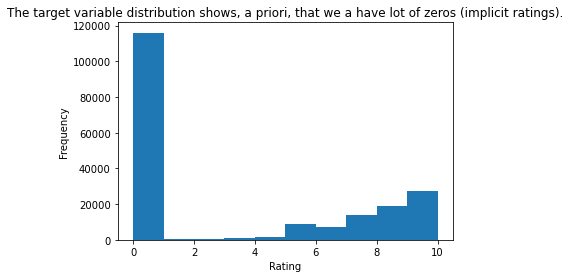

In [156]:
fig, ax = plt.subplots()
ax.hist(df["Rating"])
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("The target variable distribution shows, a priori, that we a have lot of zeros (implicit ratings).");

As can be seen on the plot, there are a lot of `0` values for the Rating variable (our target).

In [157]:
df["Rating"].loc[df["Rating"] == 0].count()

116036

In [158]:
print(f"The total number of instances with `0` rating is 116036. This makes it, as a percent of total ratings {round((116036/196842)*100,2)}%.")
print(f"Approximately 60% of our data is constituted by implicit ratings.")

The total number of instances with `0` rating is 116036. This makes it, as a percent of total ratings 58.95%.
Approximately 60% of our data is constituted by implicit ratings.


__From now on__ we will be dropping the implicit ratings (the zeros). According to the data set description, all zeros are implicit ratings. It is not defined, though, what an implicit rating is. We assume that it simply indicates that the user bought the book without rating it.
We do not want to use both types of rating, explicit and implicit, in one and the same recommender system because they have very different meanings and scales (e.g. a rating change from 0 to 1 has a completely different meaning than a rating change from 1 to 2). Given that we want to build ONE recommender system, we continue using solely explicit ratings because they appear to be much more informative on whether a user liked or disliked a book. In contrast to implicit ratings, the explicit ratings clearly indicate a like or a dislike, and they also put it on a scale. Also, as they constitute more than half our data, any way of inputating implcite ratings would completely skew the distribution in regards to the actual explicit ratings we do have.

In [159]:
df2 = df[df["Rating"] != 0]

In [160]:
df.shape

(196842, 9)

In [161]:
df2.shape       # 80,806 explicit ratings left

(80806, 9)

### Visualizations for Data Exploration

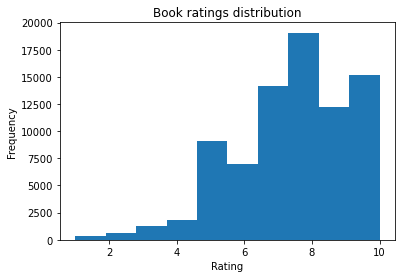

In [162]:
fig, ax = plt.subplots()
ax.hist(df2["Rating"])
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("Book ratings distribution");

In [163]:
df3 = pd.DataFrame(df2.groupby('User-ID')['Rating'].nunique())

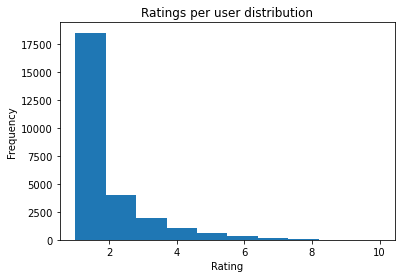

In [164]:
fig, ax = plt.subplots()
ax.hist(df3["Rating"])
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("Ratings per user distribution")
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.grid(False);

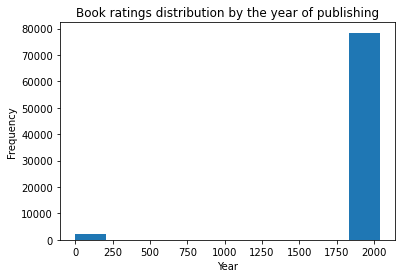

In [165]:
fig, ax = plt.subplots()
ax.hist(df2["Year"])
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.set_title("Book ratings distribution by the year of publishing");

In [166]:
Years = pd.to_numeric(df2["Year"], downcast='integer')

In [167]:
df2["Year"] = Years

<ipython-input-167-d9db51dabe23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = Years


In [168]:
df2 = df2.reset_index()

In [169]:
#For a better visual understanding of the distributions, it is useful not to include outliers
counter = 0
for i in range(len(df2)):
    if df2['Year'][i]  != 'nan':
        if df2['Year'][i] < 1940:
            counter = counter+1
print(f"There are {counter} instances where the year is prior to 1940.")

There are 2376 instances where the year is prior to 1940.


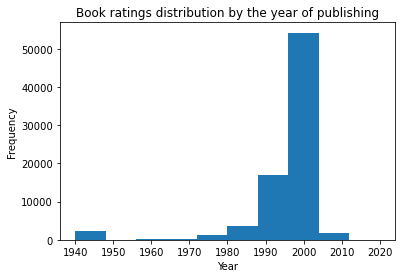

In [170]:
fig, ax = plt.subplots()
ax.hist(np.clip(df2["Year"], 1940, 2020))
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.set_title("Book ratings distribution by the year of publishing");

Note that this does not necessarily mean that there are more books in the dataset between 1990 to 2010, as there are multiple observations with the same book. It just means that there are more observations for books in that time interval.

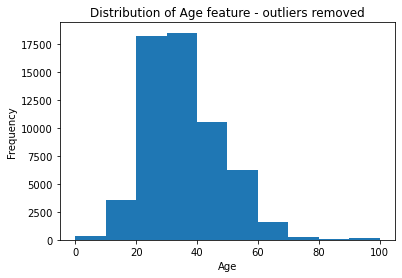

In [171]:
fig, ax = plt.subplots()
ax.hist(np.clip(df2["Age"], 0, 100))
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Age feature - outliers removed");

It is also interesting to plot some correlations between variables:

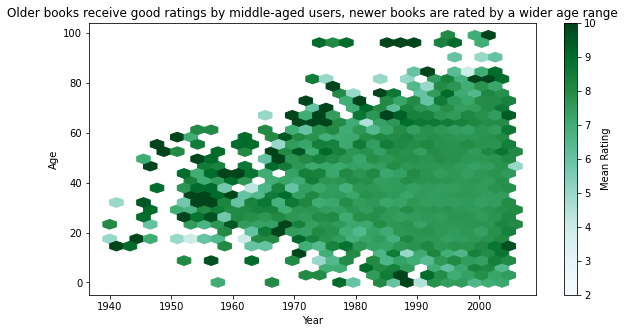

In [172]:
fig, ax = plt.subplots(1,1)
hb_1 = df2[(df2["Year"]>1939) & (df2["Year"]<2010) & (df2["Age"]<100)].plot.hexbin(x="Year", y="Age", C="Rating", reduce_C_function=np.mean, gridsize=30, figsize=(10, 5), ax=ax);
hb_1.collections[0].colorbar.set_label("Mean Rating");

ax.set_title("Older books receive good ratings by middle-aged users, newer books are rated by a wider age range");

### Important Note 
When first exploring the dataset, we thought that many instances had missing author name or missing book name. We then discovered that we actually do not have missing authors or book names. What happens is there are different ISBNs for the same book. This happens because different editions with some corrections (i.e., typos, or some phrase changes) get a new ISBN, even though they're the same book. <br> We think that it is probably a good idea not to work with the ISBN column because of this. <br><br> We checked if the Book Titles included the "Edition", which would lead them to appear as different names, but they do not.

## Clean datasets ready to use.

`df` is the clean dataset WITH the zero ratings.<br>
`df2` is the clean dataset WITHOUT the zero ratings.

# __Modeling__

We will choose one out of the following models based on its in-sample performance in terms of the Root of the Mean Squared Error (RMSE). We want to predict the rating of each book to recommend those books that a user would rate highest, and the RMSE is a measure for the error in this rating prediction. We do not rely on precision/recall at the top k recommendations because we can not observe if the users would buy our recommendations.

## Content-based recommender system

#### Algorithm from Slides 71 & 72 of Lecture 8
To our knowledge, there is no library to build a content-based recommender system. Therefore, we code our very own model here and stick to the algorithm presented on slides 71 & 72 of Lecture 8.

We set up a feature matrix for every rating in our data set, containing dummies for authors, publishers, decades of release and/or TF-IDF values for the book title. We identify all ratings made by a single user, multiply each rating of this user with the respective features of this book. The result is a matrix where highly rated books have greater values in their features than lowly rated books. Books that a user likes should have features that a user likes, so also features that a user likes should have high values in this matrix. We take the sum along the rows of this matrix, giving us a vector with absolute feature weights for this user. Finally, we divide each element of this vector by the sum of this vector, so the sum of this new vector sums up to one and we have a vector that expresses how important each feature is to the user on a scale from 0 to 1. 

It turned out that this algorithm is computationally extremely expensive, especially when it comes to the point where actual predictions are produced. To give an idea, our data set excluding zero ratings contains 26,855 unique users and 40,086 unique books, so predicting a rating for each user for each book would yield 26,855*40,086 = 1,076,509,530 predictions. Therefore, we are only able to run it with a very small sample. 

However, using more observations would also not help to make the model better. Essentially, this algorithm creates one prediction model per user, so only more observations per user would help to improve prediction accuracy.

In [173]:
df2.sort_values(by='User-ID', inplace=True)     # just sort to have a better overview for seperating the users

If we have a certain user in our sample, we want to have all of his ratings in our sample. Therefore, we do not choose the subsample randomly but we sort the data frame by User-ID and then take the first x observations. If we would just choose randomly, we may end up with one rating per user and our model would be relatively meaningless.

In [174]:
sample = df2[:500]        # take a small sample. My laptop crashed running the code below with a sample of 1,000
sample.reset_index(inplace = True)
sample

,level_0,index,User-ID,ISBN,Rating,Location,Age,Title,Author,Year,Publisher
0,10227,25761,8,1552041778,5,"timmins, ontario, canada",NaN,Jane Doe,R. J. Kaiser,1999,Mira Books
1,10233,25774,8,1881320189,7,"timmins, ontario, canada",NaN,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub
2,10232,25771,8,1575663937,6,"timmins, ontario, canada",NaN,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999,Kensington Publishing Corp.
3,10231,25770,8,1567407781,6,"timmins, ontario, canada",NaN,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade
4,10226,25759,8,074322678X,5,"timmins, ontario, canada",NaN,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner
...,...,...,...,...,...,...,...,...,...,...,...
495,14008,34685,2075,3423105518,10,"bonn, nordrhein-westfalen, germany",29.0,Name Der Rose,Umberto Eco,0,Distribooks Int'l+inc
496,14047,34738,2084,8484509125,6,"logroño, la rioja, spain",21.0,El Ultimo Adios,Mary Higgins Clark,2002,Distribooks
497,14045,34736,2084,8484500020,8,"logroño, la rioja, spain",21.0,LA Tabla De Flandes,Arturo Perez Reverte,2003,Distribooks
498,14033,34722,2084,8440616368,9,"logroño, la rioja, spain",21.0,"Ocho, El",Katherine Neville,1991,Grupo Zeta


### Feature Engineering
The issue with the features is that we should only include features that indeed drive the rating of a user. For example, if we include 'Year' (in whatever form) as a feature, we will for sure assign a certain weight to 'Year'. However, the user may actually not care at all about the year of release of the book, and thus we will make our prediction based on weights that incorrectly express the real factors that drive the user's rating. This would correspond to overfitting. Especially with only few observations per user, our model is prone to overfitting very quickly, because the user weights we estimate easily specialize on the training data with many features but few observations. On the other side, none of the features we have are very informative. The book title is probably the most relevant, though we do not have the necessary data to assign a book title to a genre or identify the 'sentiment' of a book title. Hence, we will rely on TF-IDF for the book titles to extract their information into computer-readable features (as proposed in https://medium.com/analytics-vidhya/content-based-recommender-systems-in-python-2b330e01eb80 for movie content descriptions).

Moreover, we have books in several languages in our sample (as you can see from the book titles), but we do not have a variable indicating the language of a book. Ideally, we would only want to recommend books in languages that the user knows, and for sure we do not want to recommend books in languages that the user does not know. If we knew the language of a book, we may infer the languages a user knows from his rated books. (Collaborative Filtering algorithms should take care of this implicitly already)

In [175]:
# define train and test set. Use 25% of each users ratings as test set, though at least one of his ratings must be in the 
# test set. For those users who only gave one rating, we cannot calculate a test error because we must use this one observation
# he/she gave us for the estimation of his/her weights.
train_dummy = np.zeros(len(sample))    # this list is to be appended to our data set later
user_list = sample['User-ID'].unique()
start = 0
for user in user_list:
    if len(sample[sample['User-ID']==user]) == 1:
        train_dummy[start] = 1
        start += len(sample[sample['User-ID']==user])
        continue
    stop = start + math.floor(len(sample[sample['User-ID']==user]) * 0.75)    # round downwards, to get sufficiently large test set also when many users only rated 2 or 3 books
    train_dummy[start:stop] = 1
    start += len(sample[sample['User-ID']==user])   # set start for next round of the loop at the end of current users rating block
    

In [176]:
train_dummy
sample['User-ID'].head(50)
# manual check if code above works. It works!

array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1.

0       8
1       8
2       8
3       8
4       8
5      12
6      22
7      64
8      69
9      70
10     75
11     83
12     92
13     92
14     92
15    102
16    176
17    183
18    183
19    183
20    183
21    183
22    228
23    242
24    242
25    242
26    242
27    242
28    242
29    242
30    242
31    242
32    242
33    242
34    242
35    242
36    242
37    242
38    242
39    242
40    242
41    242
42    242
43    242
44    243
45    243
46    244
47    244
48    254
49    254
Name: User-ID, dtype: int64

In [177]:
# whats the train set / test set size?
trainset_size = sum(train_dummy)/len(train_dummy)
print('Size of Train set: ', trainset_size, '. Size of test set: ', 1-trainset_size, sep='')

Size of Train set: 0.77. Size of test set: 0.22999999999999998


In [178]:
sample['trainset'] = train_dummy 

<ipython-input-178-aa9c875c4453>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['trainset'] = train_dummy


We want to make use of the publication year of a book. It might well be that a certain user preferably reads books from a certain year/decade/era. We decide to code the Year feature into century dummies. First of all, we want to use dummies because we do not believe that the goodness/popularity of a books is not a linear function of the year (a book from 1928 is not 80 units "better" or "worse" than a book from 2008), but the publication year rather expresses the writing style and genre to a certain degree. In this regard, we also believe that a book from 1974 is not much different from a book in 1975, so we group books together into centuries. 

In [179]:
# turn Year into century dummies
before1950 = np.zeros(len(sample))
y50s = np.zeros(len(sample))
y60s = np.zeros(len(sample))
y70s = np.zeros(len(sample))
y80s = np.zeros(len(sample))
y90s = np.zeros(len(sample))
y2000s = np.zeros(len(sample))
y2010s = np.zeros(len(sample))

for i in range(len(sample)):
    if sample['Year'][i] < 1950:
        before1950[i] = 1
    if (sample['Year'][i] >= 1950) & (sample['Year'][i] < 1960):
        y50s[i] = 1
    if (sample['Year'][i] >= 1960) & (sample['Year'][i] < 1970):
        y60s[i] = 1
    if (sample['Year'][i] >= 1970) & (sample['Year'][i] < 1980):
        y70s[i] = 1
    if (sample['Year'][i] >= 1980) & (sample['Year'][i] < 1990):
        y80s[i] = 1
    if (sample['Year'][i] >= 1990) & (sample['Year'][i] < 2000):
        y90s[i] = 1
    if (sample['Year'][i] >= 2000) & (sample['Year'][i] < 2010):
        y2000s[i] = 1
    if (sample['Year'][i] >= 2010) & (sample['Year'][i] < 2020):
        y2010s[i] = 1

In [180]:
year_dummies = pd.DataFrame({'before1950' : before1950,
              'y50s' : y50s,
              'y60s' : y60s,
              'y70s' : y70s,
              'y80s' : y80s,
              'y90s' : y90s,
              'y2000s' : y2000s,
              'y2010s' : y2010s})

In [181]:
# compute tf-idf for book titles
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(sample['Title'])

In [182]:
tfidf_matrix

<500x3022 sparse matrix of type '<class 'numpy.float64'>'
	with 3855 stored elements in Compressed Sparse Row format>

In [183]:
# tfidf_matrix is stored as sparse bc it contains loads of zeros. But we need it in normal form, so "unpack" it:
tfidf_matrix_full = pd.DataFrame(tfidf_matrix.toarray(), index=sample.index)

In [184]:
tfidf_matrix_full

,0,1,2,3,4,5,6,7,8,9,...,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
tfidf_matrix_full.max().max()

1.0

In [186]:
tfidf_matrix_full.min().min()

0.0

The TF-IDF values range from 0 to 1.
Thus, on average, each word or n-gram itself should receive less weight in the user_weights than the author, publisher and century

### Content - based Modelling

In [187]:
def content_recommender_predictions(complete_data, features):
    # function to compute predictions for book ratings, based on algorithm outlined on slide 71 & 72 of Lecture 7.
    # complete_data must contain User-ID, Book Title, Rating, all book features that should be considered and a columns called
    # trainset which indicates if this row should be considered for weight computation. 
    # features must be a matrix containing only the features to be consiered.
    # features and complete_data must have the same index!
    
    weighted_features = features.mul(complete_data['Rating'], axis=0)
    
    user_list = complete_data['User-ID'].unique()                           # set up user list to loop through later
    user_weights = np.empty((len(user_list),len(features.columns),))   # set up weight matrix to be filled up in the loop
    user_weights[:] = np.nan                                           # fill matrix with NaN to be able to check later if loop worked
    user_weights = pd.DataFrame(user_weights, columns = features.columns, index = user_list)    # turn into dataframe, index is user-id
    
    # for each user, compute the weights he/she puts on each feature (according to previous ratings). Add this weight vector to the user weights matrix
    for user in user_list:
        norm_weighted_features = weighted_features[(complete_data['User-ID']==user) & (complete_data['trainset']==1)].sum(axis=0)/weighted_features[(complete_data['User-ID']==user) & (complete_data['trainset']==1)].sum(axis=0).sum()
        user_weights.loc[user,:] = norm_weighted_features
    
    
    # now make predictions
    # initiate a dataframe with multiindex User-ID, Book Title to store the predictions in
    
    # first create indices
    book_list = complete_data['Title'].unique()
    user_index = list(np.repeat(user_list, len(book_list)))
    title_index = []
    for i in range(len(user_list)):
        for j in range(len(book_list)):
            title_index.append((book_list[j]))
    
    # initiate predictions dataframe
    predictions = np.empty(len(user_list)*len(book_list))
    predictions[:] = np.nan
    predictions = pd.DataFrame(predictions, index = [user_index, title_index])
    
    # compute predictions
    for user in user_list:          # for each user
        for book in book_list:      # for each book (regardless whether it is in train or test set)
            predictions.loc[user, book] = (user_weights.loc[user, :] * features[complete_data['Title']==book].iloc[0, :]).sum() * 10
    
    # Here we only produced predictions for books that are in the subsample of our rating dataset. In theory, we could
    # expand our predictions to all books in our books dataset (df_books), but this would be way too computationally
    # expensive (with 270,000 predictions per user, with 27,000 users (who gave non-zero ratings): 
    # 270,000*27,000 = 7,290,000,000 predictions). With enough computation power, though, no problemo.
    
    return predictions

In [188]:
def content_recommender_rmse(complete_data, features):
    # This function returns the RMSE of a the recommender system built in content_recommender_predictions().
    # It calls content_recommender_predictions() and compares its predictions for the test set, that is defined
    # by the column trainset in complete_data, with the actual ratings.
    
    predictions = content_recommender_predictions(complete_data, features)
    
    testset = complete_data[complete_data['trainset'] == 0]
    
    errors = []
    for user in user_list:
        books_to_test = testset[testset['User-ID']==user]['Title'].reset_index().drop(columns='index')
        for i in range(len(books_to_test)):
            prediction = predictions.loc[user, books_to_test.iloc[i,0]][0]
            actual_value = testset[(testset['User-ID'] == user) & (testset['Title'] == books_to_test.iloc[i,0])]['Rating'].reset_index().drop(columns = 'index').iloc[0][0]
            errors.append(actual_value - prediction)
            
    errors = np.array(errors)
    squared_errors = errors**2
    mean_squared_error = sum(squared_errors)/len(squared_errors)
    rmse = math.sqrt(mean_squared_error)
    return rmse

In [189]:
# get data sets with different combinations of features to put into content_recommender_rmse()

# similarly to the Year feature, we believe that dummies for author and publisher may be informative for the
# content/genre/style of a book.
sample_author = pd.get_dummies(sample, columns = ['Author'])
sample_publisher = pd.get_dummies(sample, columns = ['Publisher'])
sample_author_publisher = pd.get_dummies(sample, columns = ['Author','Publisher'])

sample_tfidf = pd.concat([sample, tfidf_matrix_full], axis=1)
sample_author_tfidf = pd.concat([sample_author, tfidf_matrix_full], axis=1)
sample_publisher_tfidf = pd.concat([sample_publisher, tfidf_matrix_full], axis=1)
sample_author_publisher_tfidf = pd.concat([sample_author_publisher, tfidf_matrix_full], axis=1)
sample_author_publisher_year =  pd.concat([sample_author_publisher, year_dummies], axis=1)
sample_author_publisher_year_tfidf =  pd.concat([sample_author_publisher_year, tfidf_matrix_full], axis=1)

features_author = sample_author.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'Publisher', 'trainset'])
features_publisher = sample_publisher.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'Author', 'trainset'])
features_author_publisher = sample_author_publisher.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'trainset'])
features_tfidf = sample_tfidf.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'Author','Publisher', 'trainset'])
features_author_tfidf = sample_author_tfidf.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'Publisher', 'trainset'])
features_publisher_tfidf = sample_publisher_tfidf.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Author', 'Year', 'trainset'])
features_author_publisher_tfidf = sample_author_publisher_tfidf.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'trainset'])
features_author_publisher_year = sample_author_publisher_year.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'trainset'])
features_author_publisher_year_tfidf = sample_author_publisher_year_tfidf.drop(columns = ['level_0', 'index', 'User-ID', 'ISBN', 'Rating', 'Location', 'Age', 'Title', 'Year', 'trainset'])

In [190]:
print('author: ', content_recommender_rmse(sample_author, features_author))
print('publisher: ', content_recommender_rmse(sample_publisher, features_publisher))
print('author, publisher: ', content_recommender_rmse(sample_author_publisher, features_author_publisher))
print('tfidf: ', content_recommender_rmse(sample_tfidf, features_tfidf))
print('author, tfidf: ', content_recommender_rmse(sample_author_tfidf, features_author_tfidf))
print('publisher, tfidf: ', content_recommender_rmse(sample_publisher_tfidf, features_publisher_tfidf))
print('author, publisher, tfidf: ', content_recommender_rmse(sample_author_publisher_tfidf, features_author_publisher_tfidf))
print('author, publisher, year: ', content_recommender_rmse(sample_author_publisher_year, features_author_publisher_year))
print('author, publisher, year, tfidf: ', content_recommender_rmse(sample_author_publisher_year_tfidf, features_author_publisher_year_tfidf))

author:  7.731857110981557
publisher:  7.596507742851679
author, publisher:  7.616147971094236
tfidf:  7.945855008052587
author, tfidf:  7.854145123040985
publisher, tfidf:  7.81811845652285
author, publisher, tfidf:  7.774287225594564
author, publisher, year:  6.654066221632632
author, publisher, year, tfidf:  7.200462136737049


#### Does not look good. Content-based model is not viable with regards to the data we have.

#### Cluster book titles?
We could try to compute TF-IDF for the book title and apply a clustering algorithm based on the TF-IDF values to group similar titles together. Using clustered book titles as features may prevent overfitting in a content-based recommender system.

We need a good amount of observations to obtain a reasonable clustering.

In [191]:
kmeans_kwargs = {
      "init": 'k-means++',
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 90):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs);
     kmeans.fit(tfidf_matrix_full);
     sse.append(kmeans.inertia_);

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KMeans(n_clusters=11, random_state=42)

KMeans(n_clusters=12, random_state=42)

KMeans(n_clusters=13, random_state=42)

KMeans(n_clusters=14, random_state=42)

KMeans(n_clusters=15, random_state=42)

KMeans(n_clusters=16, random_state=42)

KMeans(n_clusters=17, random_state=42)

KMeans(n_clusters=18, random_state=42)

KMeans(n_clusters=19, random_state=42)

KMeans(n_clusters=20, random_state=42)

KMeans(n_clusters=21, random_state=42)

KMeans(n_clusters=22, random_state=42)

KMeans(n_clusters=23, random_state=42)

KMeans(n_clusters=24, random_state=42)

KMeans(n_clusters=25, random_state=42)

KMeans(n_clusters=26, random_state=42)

KMeans(n_clusters=27, random_state=42)

KMeans(n_clusters=28, random_state=42)

KMeans(n_clusters=29, random_state=42)

KMeans(n_clusters=30, random_state=42)

KMeans(n_clusters=31, random_state=42)

KMeans(n_clusters=32, random_state=42)

KMeans(n_clusters=33, random_state=42)

KMeans(n_clusters=34, random_state=42)

KMeans(n_clusters=35, random_state=42)

KMeans(n_clusters=36, random_state=42)

KMeans(n_clusters=37, random_state=42)

KMeans(n_clusters=38, random_state=42)

KMeans(n_clusters=39, random_state=42)

KMeans(n_clusters=40, random_state=42)

KMeans(n_clusters=41, random_state=42)

KMeans(n_clusters=42, random_state=42)

KMeans(n_clusters=43, random_state=42)

KMeans(n_clusters=44, random_state=42)

KMeans(n_clusters=45, random_state=42)

KMeans(n_clusters=46, random_state=42)

KMeans(n_clusters=47, random_state=42)

KMeans(n_clusters=48, random_state=42)

KMeans(n_clusters=49, random_state=42)

KMeans(n_clusters=50, random_state=42)

KMeans(n_clusters=51, random_state=42)

KMeans(n_clusters=52, random_state=42)

KMeans(n_clusters=53, random_state=42)

KMeans(n_clusters=54, random_state=42)

KMeans(n_clusters=55, random_state=42)

KMeans(n_clusters=56, random_state=42)

KMeans(n_clusters=57, random_state=42)

KMeans(n_clusters=58, random_state=42)

KMeans(n_clusters=59, random_state=42)

KMeans(n_clusters=60, random_state=42)

KMeans(n_clusters=61, random_state=42)

KMeans(n_clusters=62, random_state=42)

KMeans(n_clusters=63, random_state=42)

KMeans(n_clusters=64, random_state=42)

KMeans(n_clusters=65, random_state=42)

KMeans(n_clusters=66, random_state=42)

KMeans(n_clusters=67, random_state=42)

KMeans(n_clusters=68, random_state=42)

KMeans(n_clusters=69, random_state=42)

KMeans(n_clusters=70, random_state=42)

KMeans(n_clusters=71, random_state=42)

KMeans(n_clusters=72, random_state=42)

KMeans(n_clusters=73, random_state=42)

KMeans(n_clusters=74, random_state=42)

KMeans(n_clusters=75, random_state=42)

KMeans(n_clusters=76, random_state=42)

KMeans(n_clusters=77, random_state=42)

KMeans(n_clusters=78, random_state=42)

KMeans(n_clusters=79, random_state=42)

KMeans(n_clusters=80, random_state=42)

KMeans(n_clusters=81, random_state=42)

KMeans(n_clusters=82, random_state=42)

KMeans(n_clusters=83, random_state=42)

KMeans(n_clusters=84, random_state=42)

KMeans(n_clusters=85, random_state=42)

KMeans(n_clusters=86, random_state=42)

KMeans(n_clusters=87, random_state=42)

KMeans(n_clusters=88, random_state=42)

KMeans(n_clusters=89, random_state=42)

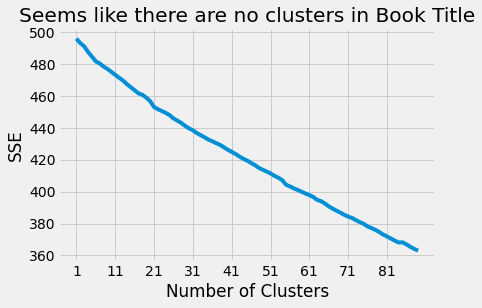

In [192]:
plt.style.use("fivethirtyeight");
plt.plot(range(1, 90), sse);
plt.xticks(range(1, 90, 10));
plt.xlabel("Number of Clusters");
plt.ylabel("SSE");
plt.title("Seems like there are no clusters in Book Title")
plt.show();

## Conclusion on content-based recommender system
Our content-based recommender systems using different combinations of features all perform very poorly. This is because we do not have sufficient data that describes the content of a book. Collaborative filtering is probably better at recommending because it does not exploit features to infer on the content of a book but it exploits users' rating behaviour. This rating behaviour probably implicitly says more about the content of books than the features we have in our data set.

Adding more observations to our training set in the content-based recommender system would probably not help to reduce the prediction error because we need more observations per user. Adding observations of other users does not help. We are basically estimating a one model per user, so adding more users does not help with our prediction precision.

## Collaborative Filtering 

In [193]:
# We only need userID, Title and rating. We use Title as item identifier instead of ISBN, because different
# editions of the same book have different ISBN. So, we consider different editions of a book as the same book.
ratings = df2[["User-ID", "Title", "Rating"]]
# do not consider ratings=0
ratings = ratings[ratings["Rating"]>0]
# reduce storage space
ratings["Rating"] = ratings["Rating"].astype(np.int8)

In [194]:
# Full Dataset is too large to use it in one run, so we take only a subsample for now
# For collaborative filtering, we want as many overlaps in rated books between users as possible.
# Therefore, do not select a random sample where we may end up with one rating per user, but order the 
# data by User-ID and then take the first x% of observations.
ratings.sort_values(by="User-ID", inplace=True)
sample = ratings[:round(len(ratings)*0.5)]      # use half of the data set
# sample = ratings.sample(frac=0.1, random_state = 420)

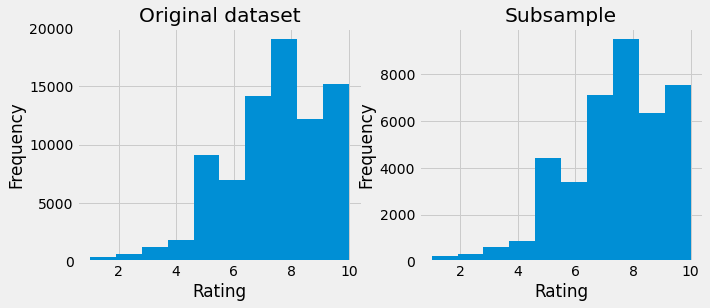

In [195]:
# Does the subsample have an equal distribution of ratings as the original data set?
fig, ax = plt.subplots(1,2)
ax[0].hist(ratings["Rating"])
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Original dataset");

ax[1].hist(sample["Rating"])
ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Subsample");

fig.set_figheight(4);
fig.set_figwidth(10);

In [196]:
# GridSearchCV, which we will use to find the best model parameters, is not compatible with the trainset obtained
# from the surprise.model_selection train-test-split method. However, we MUST use a trainset obtained from the 
# surprise.model_selection train-test-split method later when fitting our best model. Therefore, we need to split
# trainset and testset here manually. We will not use the testset in GridSearchCV, because GridSearchCV apllies 
# corss validation on the trainset. Instead, we hold out the testset now and we will only use it later to estimate 
# the performance of the best model obtained from GridSearchCV

testset = sample.sample(frac=0.1)    # holdout this set to estimate performance of the final model at the end
trainset = sample.append(testset).drop_duplicates(keep=False)       # remaining data set = trainset

In [197]:
# bring trainset into the correct format for estimation
reader = Reader(rating_scale=(1, 10))
trainset = Dataset.load_from_df(trainset, reader)
testset = Dataset.load_from_df(testset, reader)

## Memory-based

For the memory-based, we tune the hyperparamters min_support (minimum number of neighbours) and k (maximum number of neighbours), and we test whether measuring cosine-similarity or msd-similirity and whether a user-based or an item-based model give better results, respectively.

In [198]:
sim_options = {
    "name": ["cosine", "msd"],
    "min_support": [9, 10, 11, 12, 13, 14, 15],
    "user_based": [False, True],
}

param_grid = {"k":[10, 20], "sim_options": sim_options}

grid_memory = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse"], cv=4)    # cv=4 (relatively small) to speed up computation
grid_memory.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [199]:
print(grid_memory.best_params)
print(grid_memory.best_score)

{'rmse': {'k': 10, 'sim_options': {'name': 'cosine', 'min_support': 12, 'user_based': True}}}
{'rmse': 1.8733871599295175}


## Model-based

For the model-based, the situation is the quite similar, we have tried several values, included all the possible parameters in the "param_grid". The best combination seems to be {'n_epochs': 45, 'lr_all': 0.006, 'reg_all': 0.07}. 

__Note__: The following code was written as a comment because it takes a long time to run and we just kept the last cell as it contains the best combination of hyperparameters.

In [200]:
# param_grid = {
  #  "n_epochs": [5, 10, 20],
#     "lr_all": [0.002, 0.005, 0.007],
 #   "reg_all": [0.02, 0.04, 0.06]
#}
#grid_model = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=4)
#grid_model.fit(trainset)

In [201]:
#print(grid_model.best_params["rmse"])    
#print(grid_model.best_score["rmse"])

In [202]:
#param_grid = {
#    "n_epochs": [5, 10, 20],
#    "lr_all": [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009],
#    "reg_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
#}
#grid_model = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=4)
#grid_model.fit(trainset)

In [203]:
#print(grid_model.best_params["rmse"])    
#print(grid_model.best_score["rmse"])


In [204]:
#param_grid = {
#    "n_epochs": [50, 55, 60, 65, 75],
#    "lr_all": [0.005, 0.006, 0.007, 0.008, 0.009],
#    "reg_all": [0.05, 0.06, 0.07, 0.08, 0.09]
#}
#grid_model = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=4)
#grid_model.fit(trainset)

In [205]:
#print(grid_model.best_params["rmse"])    
#print(grid_model.best_score["rmse"])

In [206]:
param_grid = {
    "n_epochs": [25, 30, 35, 40, 45],
    "lr_all": [0.005, 0.006, 0.007, 0.008, 0.009],
    "reg_all": [0.05, 0.06, 0.07, 0.08, 0.09]
}
grid_model = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=4)
grid_model.fit(trainset)

In [207]:
print(grid_model.best_params["rmse"])    
print(grid_model.best_score["rmse"])

{'n_epochs': 45, 'lr_all': 0.006, 'reg_all': 0.07}
1.733229568181965


In [208]:
# find the best performing model out of memory-based and model-based CF
if grid_model.best_score["rmse"] <= grid_memory.best_score["rmse"]:
    best_CF_model = grid_model.best_estimator["rmse"]
else:
    best_CF_model = grid_memory.best_estimator["rmse"]

In [209]:
best_CF_model

# Our best model
is a model-based Collaborative Filtering recommender system with 45 iterations of the SGD procedure, a learning rate of 0.006, and a regularization term of 0.07. We choose this model, and evaluate its performance on unseen data now.

## Model Evaluation
Here we test the model performance of our chosen model on data that it has not seen yet. The performance on this data set can be considered the real-world performance of our model.

In [210]:
# We use the train_test_split method now only because it generates a data format that is necessary for estimation.
# The actual split was already done previously

# Take basically 100% of the previously selected training sample as trainset
trainset, _ = train_test_split(trainset, test_size=0.00000000000001, random_state=42)

# Take basically 100% of the held out set from the beginning as testset
_, testset = train_test_split(testset, test_size=0.9999999999999, random_state=42)

# 0 or 1 are unfortunately not allowed for "test_size", so we lose a tiny share of observations here, if at all

In [211]:
best_CF_model.fit(trainset)

In [212]:
predictions = best_CF_model.test(testset)

In [213]:
accuracy.rmse(predictions)

RMSE: 1.7069


1.7068867192487498

The out-of-sample RMSE is lower than in-sample. While this is technically possible, it is very unlikely. At least, this may be a sign that our model is not overfitting the training sample.

Our chosen model has a out-of-sample RMSE of 1.7328. The RMSE has the same unit as the dependent variable, and so the acceptable values for this measure vary depending on the dependent variable. It tells us how close the true data points are to the predicted points made by the model. Since our the variable 'Ratings' varies between 1 and 10, it means that the predictions are somewhat far away from the true values. While it is not so bad (a true 9 is not predicted to be a 5), this value reflects a relatively moderate abilitiy of the model to make accurate predictions.

## Recommend the top 10 books to a user
Unfortunately, it seems that there is no method to predict the rating of a list of items. Therefore, we apply a loop to compute a rating prediction for every book in our data set, sort descendingly by rating and output the top 10 books.

In [214]:
user = '8'  # make recommendations for user 8
book_list = sample['Title'].unique()
predicted_rating = []

for item in book_list:
    # get a prediction for specific users and items.
    predicted_rating.append(best_CF_model.predict(user, item)[3])
    
Recommendations = pd.DataFrame({"Book" : book_list, "Predicted Rating" : predicted_rating})
Recommendations['Predicted Rating'] = Recommendations['Predicted Rating'].round(2)
Recommendations.sort_values(by="Predicted Rating", ascending=False).head(10)

,Book,Predicted Rating
1200,Postmarked Yesteryear: 30 Rare Holiday Postcards,8.95
9164,Maus 1. Mein Vater kotzt Geschichte aus. Die G...,8.86
12098,"Wolves of the Calla (The Dark Tower, Book 5)",8.86
478,Name Der Rose,8.86
2820,"Eats, Shoots &amp; Leaves: The Zero Tolerance ...",8.79
6720,Lonesome Dove,8.79
700,The Cat in the Hat,8.77
1190,Per Anhalter durch die Galaxis.,8.75
2751,Felidae. Roman.,8.74
4172,Redeeming Love,8.74


We can apply this same code to every user on the list, and get recommendations for any user.

It seems that either user 8 speaks German, French and English, or the Collaborative Filtering did not succeed in identifying the users' language. In any case, if we had data on the language of the books, we should here now filter out books in languages that the user did not read before.

## Model Interpretability
### Content-based
The interpretability of our content-based recommender system is relatively straightforward. Based on previous ratings, we set up a user profile containing relative weights for each book feature. To make a prediction for the rating of a book, we multiply the user profile vector with the feature vector of the book. Therefore, it is relatively easy to trace back why we predict a certain rating for a book.

The TF-IDF values we computed for each book title are not as easy to understand as a book feature since those are words turned into computer-readable numbers. However, it is still does not require great effort to roughly translate those numbers back into words and meaning, and our best content-based model did not even take the TF-IDF values as a feature.

### Collaborative Filtering
Predictions produced through Collaborative Filtering are less transparent than predictions from our content-based model because they do not explicitly rely on book features but rather implicitly infer on book features from the ratings of the complete corpus of users.

#### Memory-based
Memory-based Collaborative Filtering algorithms find the most similar 1) users or 2) items (books) in terms of ratings and then predict a rating for a certain book based on 1) the ratings of up to k similar users or 2) the ratings of up to k similar books. Therefore, although it requires a deeper dive into the algorithm, predictions made by memory-based systems are also relatively easy to explain. It is possible to reconstruct for each single user who are the most similar to her or for each single book which are the most similar ones, solely based on the existing ratings.

#### __Model-based__
Our preferred recommender system is also the most intransparent one, though similarly as memory-based models, it inplicitly infers on book features to make a prediction. It boils down the ratings matrix of users and books into the mulitplication of a user factor vector and an item factor vector, which represent each user's or item's affinity to a ceratin feature. The meaning of the feature itself remains unclear, but it reflects some underlying characteristics in the data. To understand what those features mean, we may plot the book titles in the feature space to see which books are close to each other in the respective dimension. This would then also help to understand the predictions made by this model-based recommender system, by spotting the rated books of a user and her recommendations in the plot, and seeing how they relate to each other in the feature space.

In [221]:
# restore the old trainset from the beginning
sample = ratings[:round(len(ratings)*0.5)]      
testset = sample.sample(frac=0.1)    
trainset = sample.append(testset).drop_duplicates(keep=False)      

book_list = trainset['Title'].unique()[:22228]     # drop a couple obs at the end because the restored trainset and the trainset for modelling are not exactly the same size

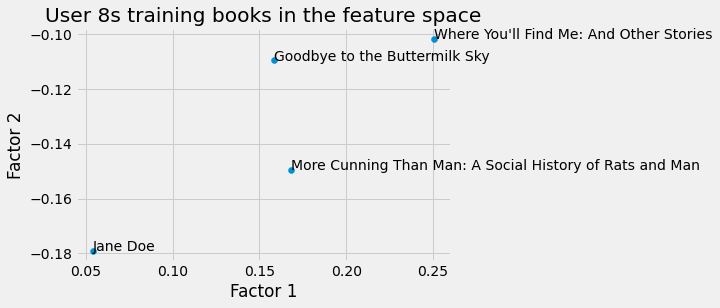

In [223]:
import matplotlib.pyplot as plt

x = best_CF_model.qi[:,0][:4]
y = best_CF_model.qi[:,1][:4]

plt.scatter(x, y);
plt.title('User 8s training books in the feature space');
plt.xlabel('Factor 1');
plt.ylabel('Factor 2');
plt.text(x[0], y[0], book_list[0])
plt.text(x[1], y[1], book_list[1])
plt.text(x[2], y[2], book_list[2])
plt.text(x[3], y[3], book_list[3])
plt.show();

## Fairness

From the user's perspective, we do not consider the "fairness" of our recommender system to be an issue. It is an assisitve model, and it does not take decision but rather recommends options. These recommendations are likely to influence the user's behaviour, but the final decision is still up to her.

However, since Collaborative Filtering tends to recommend popular items, one may consider it unfair for lesser known book authors. These authors may write books with similar features as popular books but they will be underrepresented in our recommendations and may make less revenue. To counteract this issue in the future, we would recommend to 1) collect more precise features on the book content (e.g. genre) and build a hybrid of Collaborative Filtering and content-based recommeder system and 2) hand-curate lists of undercover book tips.